In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Dell\OneDrive\Desktop\ML PROJECT\MNIST.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

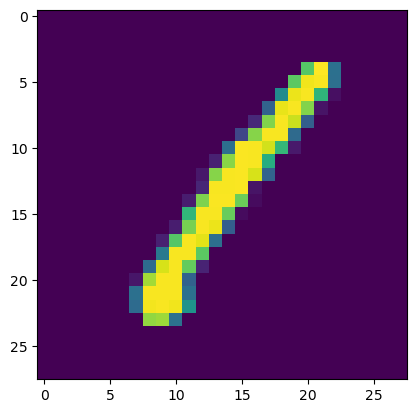

In [5]:
df1 = df.iloc[:,1::]
abcd = df1.iloc[0]
abcd = np.array(abcd)
abcd = abcd.reshape(28,28)
plt.imshow(abcd)

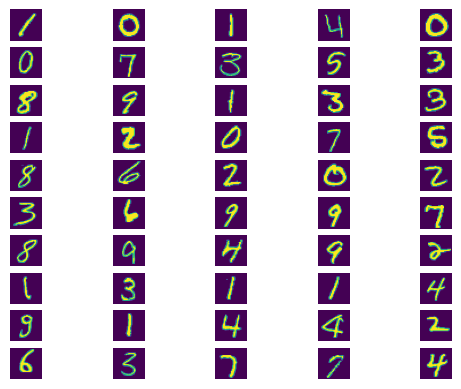

In [6]:
df1= df.iloc[:,1::]
df1 = np.array(df1)
for i in range (50):
    plt.subplot(10,5,i+1)
    plt.imshow(df1[i,:].reshape(28,28))
    plt.axis("off")
    

In [7]:
from sklearn.model_selection import  train_test_split

In [8]:
df_train , df_test = train_test_split(df , test_size=0.2)

In [9]:
df_train_x = df_train.iloc[:,1::]
df_train_y = df_train.iloc[: , 0]
df_test_x = df_test.iloc[:,1::]
df_test_y = df_test.iloc[: , 0]

In [10]:
df_train_x.shape

(33600, 784)

In [11]:
df_test_y.shape

(8400,)

In [12]:
# this step is optional but recommended

In [13]:
#designing of NN

In [14]:
model = tf.keras.models.Sequential()       # desining of model
model.add (tf.keras.layers.Dense(128 ,activation=tf.nn.relu)) #first layer
model.add (tf.keras.layers.Dense(64 ,activation=tf.nn.relu))  #second layer
model.add (tf.keras.layers.Dense(128 ,activation=tf.nn.relu))  # 3rd layer
model.add (tf.keras.layers.Dense(10 , activation=tf.nn.softmax)) #output layer
model.compile(optimizer="adam" ,loss = 'sparse_categorical_crossentropy' , metrics=['accuracy'])

In [15]:
df_train_x = np.array(df_train_x)
df_train_y = np.array(df_train_y)

In [16]:
model.fit(df_train_x ,df_train_y, epochs=15 , validation_split= 0.2 , batch_size = 500)

Epoch 1/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.4177 - loss: 17.7203 - val_accuracy: 0.7780 - val_loss: 1.2328
Epoch 2/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8181 - loss: 0.8948 - val_accuracy: 0.8406 - val_loss: 0.7902
Epoch 3/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8758 - loss: 0.5331 - val_accuracy: 0.8646 - val_loss: 0.6100
Epoch 4/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9039 - loss: 0.3599 - val_accuracy: 0.8775 - val_loss: 0.5385
Epoch 5/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9153 - loss: 0.3043 - val_accuracy: 0.8891 - val_loss: 0.4732
Epoch 6/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9325 - loss: 0.2440 - val_accuracy: 0.8955 - val_loss: 0.4434
Epoch 7/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9429 - loss: 0.1883 - val_accuracy: 0.9003 - val_loss: 0.4294
Epoch 8/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9506 - loss: 0.1617 - val_accuracy: 0.9042 - 

In [17]:
mnist_test_x = np.array(df_test_x)

In [18]:
pred_values = model.predict(mnist_test_x)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [19]:
pred_values

array([[2.4566457e-08, 3.9813756e-11, 2.4250907e-12, ..., 2.5732390e-14,
        1.3866430e-05, 2.3131070e-04],
       [9.4108163e-06, 3.5613184e-09, 9.5376288e-07, ..., 5.8327906e-08,
        1.2702316e-07, 4.5242209e-06],
       [1.6895415e-13, 1.0663894e-21, 1.7475239e-17, ..., 1.3273456e-21,
        1.2731569e-10, 1.5356388e-17],
       ...,
       [6.3597988e-11, 4.5930681e-10, 1.0302546e-08, ..., 2.5877829e-12,
        9.9999809e-01, 1.8228171e-07],
       [1.4240212e-15, 2.3433878e-20, 1.0542239e-18, ..., 1.5333381e-13,
        9.2942775e-18, 9.9999952e-01],
       [1.6361836e-16, 1.0000000e+00, 5.7911225e-20, ..., 7.9697280e-09,
        3.6132772e-14, 1.8275100e-16]], dtype=float32)

In [20]:
pred_values.shape

(8400, 10)

In [21]:
np.sum(pred_values[0])

1.0

In [22]:
pred_classes = np.argmax(pred_values , axis =1)
print(pred_classes)

[5 3 5 ... 8 9 1]


In [23]:
from sklearn.metrics import confusion_matrix

In [27]:
cm =confusion_matrix(df_test_y , pred_classes)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(df_test_y , pred_classes)*100

92.94047619047619

Text(95.72222222222221, 0.5, 'Truth')

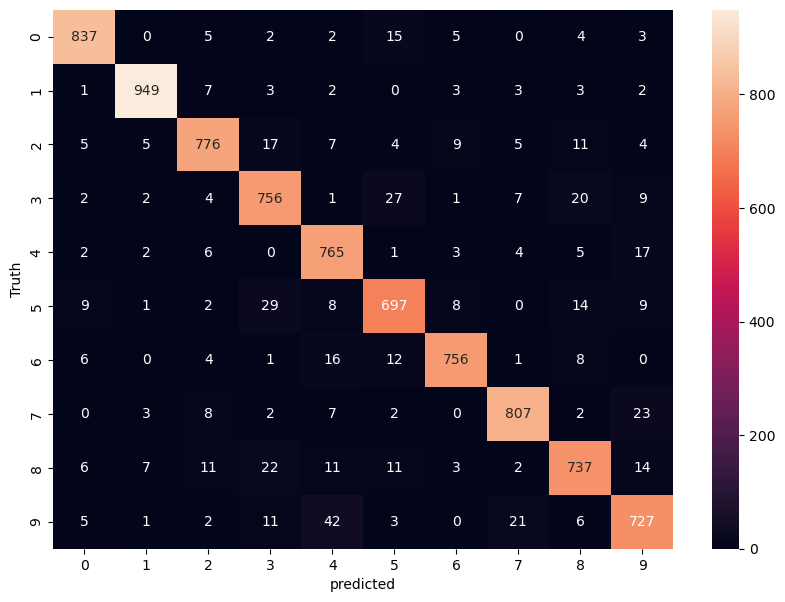

In [29]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm , annot=True ,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')